<a href="https://colab.research.google.com/github/amohd63/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/Manual_ENCS5141_Exp4__Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment #4: Supervised Learning

In this experiment, we will explore supervised learning techniques for regression and classification tasks. We will use Python and the Scikit-learn library to implement linear regression, polynomial regression, random forest classifier, and SVM models. We will also evaluate the models using appropriate evaluation measures. The topics that will be discussed in the experiment are
##4.1 Regression
4.1.1 Generating examples \
4.1.2 Linear regression \
4.1.3 Polynomial regression
##4.2 Classification
4.2.1 Generating examples \
4.2.2 Classification with random forests \
4.2.3 Classification with SVM
##4.3 Hyper-parameters selection
##4.4 To Do

---


**Scikit-learn installation**

To install the Scikit-learn library, you can use the following command

In [ ]:
!pip install -U scikit-learn

In order to check your installation you can use

In [ ]:
!pip show scikit-learn # to see which version and where scikit-learn is installed

In [ ]:
!pip freeze  # to see all packages installed in the active virtualenv

In [ ]:
!python -c "import sklearn; sklearn.show_versions()"

Note that in order to avoid potential conflicts with other packages it is strongly recommended to use a virtual environment (venv) or a conda environment.


# **4.1 Regression**

Regression is a statistical technique that relates a continuous dependent variable to one or more independent variables. In this part, we will fit different regression models on a toy dataset.

## **4.1.1 Generating examples**

We will start by generating a toy dataset. Generate 40 examples using the following function

<center>f(x) = sin(x) + $ϵ_{,}$</center>

where $ϵ$ is sampled from a normal distribution with standard deviation 0.1, and $x$ ∈ [0, 1). Split the samples to into two equal sets: training set, and testing set.



<center>Code Snippet 4.1: Generating examples.<center/>

In [1]:
import numpy as np

def true_fun(X):
  return np.sin(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 40

X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1

X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

Plot both the training and testing examples in a scatter plot and show the true function curve for the range [0, 1).

<center>Code Snippet 4.2: Plotting the dataset.<center/>

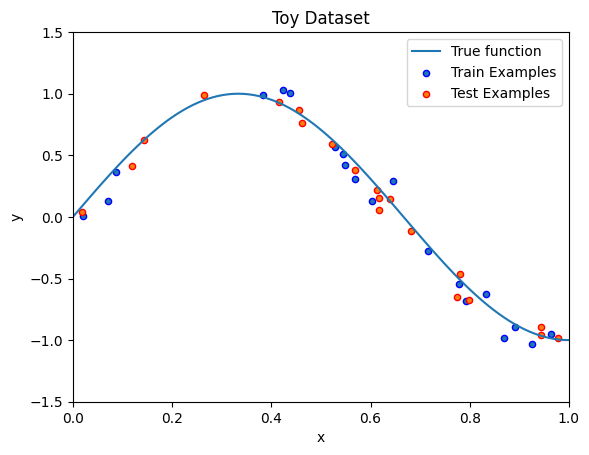

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

## **4.1.2 Linear regression**

Let’s begin with a simple linear regression model. I.e., we will fit a line to the training set of the form

<center>h(x) = $w_{o}$ + $w_{1}$$x_{,}$</center>

where $w$ is the input feature, $w_{o}$ is the intercept of the fitted line, and $w_{1}$ is its slope. We will use the linear regression implementation from sklearn to get our model. Plot the fitted line.

<center>Code Snippet 4.3: Linear regression.<center/>

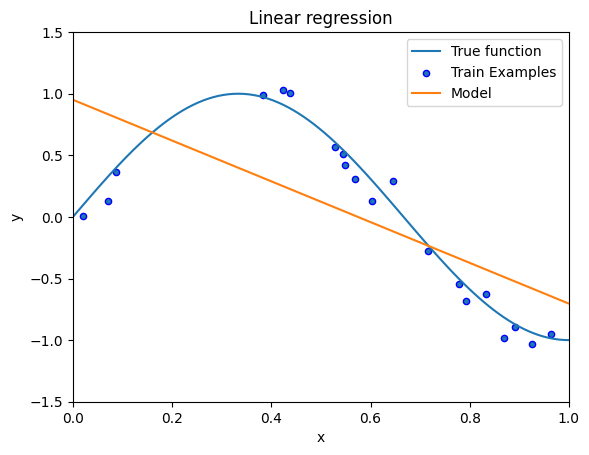

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)

plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

***Task 1***: *Compute the mean squared error of the learned linear model on the test set.*

**Mean squared error (MSE)** measures error in statistical models by using the average squared difference between observed and predicted values.

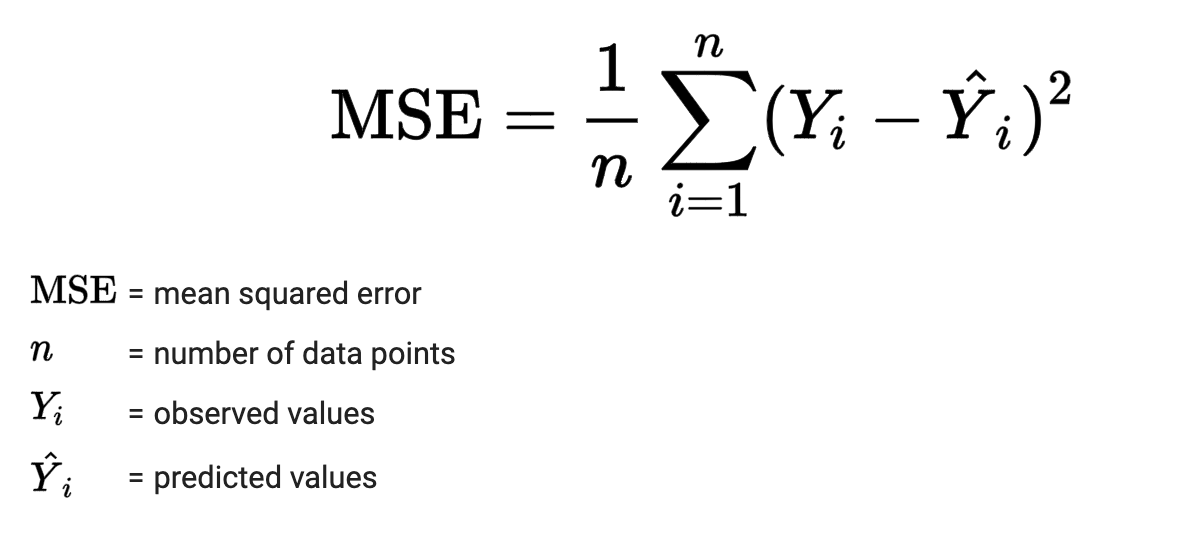

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = linear_regression.predict(X_test[:, np.newaxis])

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1736489094130998


## **4.1.3 Polynomial regression**

Let’s begin with a simple linear regression model. I.e., we will fit a line to the training set of the form

<center>h(x) = $w_{o}$ + $w_{1}$$x_{,}$ + $w_{2}$$x^{2}$,</center>

To get the non-linear basis functions for the quadratic model, we will use *PolynomialFeatures* from *sklearn*.


<center>Code Snippet 4.4: Quadratic model.<center/>

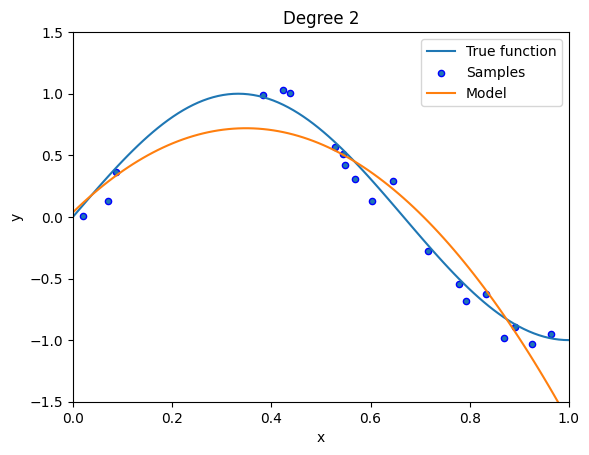

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(2, include_bias=True)

q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

x = np.linspace(0, 1, 100)

plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:, np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Degree 2")
plt.show()

***Task 2***: *Repeat the previous part with polynomials with degree 4 and 15.*

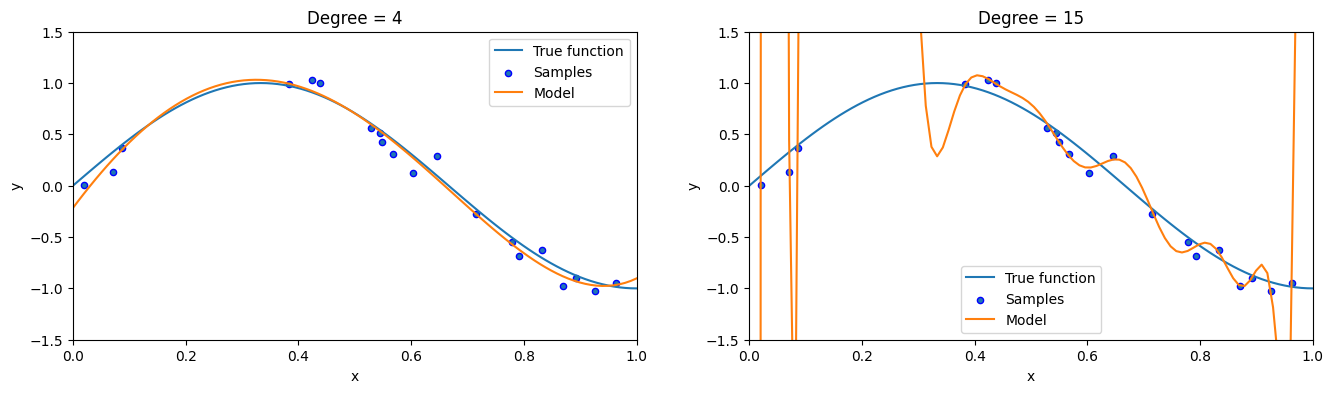

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

degrees = [4, 15]
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree, include_bias=True)
    q_model = LinearRegression()
    q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

    x = np.linspace(0, 1, 100)

    axs[i].plot(x, true_fun(x), label="True function")
    axs[i].scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
    axs[i].plot(x, q_model.predict(polynomial_features.fit_transform(x[:, np.newaxis])), label="Model")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_xlim((0, 1))
    axs[i].set_ylim((-1.5, 1.5))

    axs[i].legend(loc="best")
    axs[i].set_title("Degree = " + str(degree))

***Task 3***: *Compute the mean squared error of the learned models on the test set. Which model is the best?*

In [ ]:
from sklearn.metrics import mean_squared_error

degrees = [2, 4, 15]

for degree in degrees:
  polynomial_features = PolynomialFeatures(degree, include_bias=True)

  q_model = LinearRegression()
  q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

  X_test_poly = polynomial_features.transform(X_test[:, np.newaxis])
  y_pred = q_model.predict(X_test_poly)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)

  print(f"Mean Squared Error on Test Set (degree " + str(degree) + "): ", mse)

Mean Squared Error on Test Set (degree 2):  0.05626601819711916
Mean Squared Error on Test Set (degree 4):  0.004641799299812718
Mean Squared Error on Test Set (degree 15):  503.6525031549251


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [2, 4, 15]

for degree in degrees:
  polynomial_features = PolynomialFeatures(degree, include_bias=True)

  q_model = LinearRegression()
  q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

  X_train_poly = polynomial_features.transform(X_train[:, np.newaxis])
  y_pred = q_model.predict(X_train_poly)

  # Calculate the mean squared error
  mse = mean_squared_error(y_train, y_pred)

  print(f"Mean Squared Error on Train Set (degree " + str(degree) + "): ", mse)

Mean Squared Error on Train Set (degree 2):  0.044039217500454184
Mean Squared Error on Train Set (degree 4):  0.009330520579026787
Mean Squared Error on Train Set (degree 15):  0.0012653762307917823


**The best model** is the one with the smallest MSE value. In our case, the model with **degree** *4*.

# **4.2 Classification**

Classifications is a supervised learning task where the goal is to predict a categorical (discrete) target label. In this part we will experiment with random forests and SVM classifiers on a toy dataset.

## **4.2.1 Generating examples**

In this part, we will generate a toy dataset for classification. We are going to use the *make_classification* function from *sklearn* to generate the data and then split them into training and testing sets using *train_test_split*.

Run the following code to generate and visualize the dataset.

<center>Code Snippet 4.5: Toy dataset for classification.<center/>

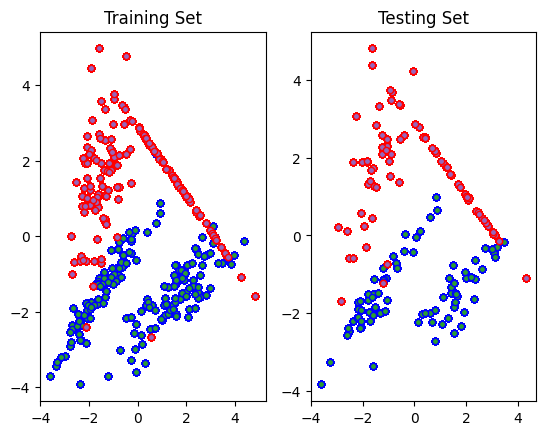

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                          n_informative=2, n_redundant=0,
                          n_clusters_per_class=2, random_state=0,
                          shuffle=True, class_sep=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")

for c in y_train:
  ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
            [X_train[i, 1] for i in np.where(y_train==c)],
            edgecolor=colors[c], s=20, label="Samples")

  ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] ,
            [X_test[i, 1] for i in np.where(y_test==c)],
            edgecolor=colors[c], s=20, label="Samples")

## **4.2.2 Classification with random forests**

A random forest is an ensemble model that fits a number of decision tree classifiers on various sub-samples of the dataset. Each tree is trained on a bootstrap samples of the training set to introduce randomness in the trees. Furthermore, when selecting a feature for a test node during tree construction, only a subset of the features is
considered for the candidate tests. The final prediction in random forests is usually obtained by averaging predictions from all trees.

Let’s start by testing a random forest of 2 trees on the dataset we generated in the previous section. The following code trains a random forest on the training set and prints both the training and testing accuracy.


<center>Code Snippet 4.6: Random forest classifier.<center/>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2,
                            criterion="entropy",
                            max_features="sqrt", max_samples=.8,
                            random_state=0)

clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


For classification, accuracy is not the only used metrics. There are many other metrics such as precision, recall, F1-score, ...etc. All of these metrics can be derived form the the confusion matrix. The following code computes the confusion matrix for the random forest trained in the previous part.

<center>Code Snippet 4.7: Confusion Matrix.<center/>

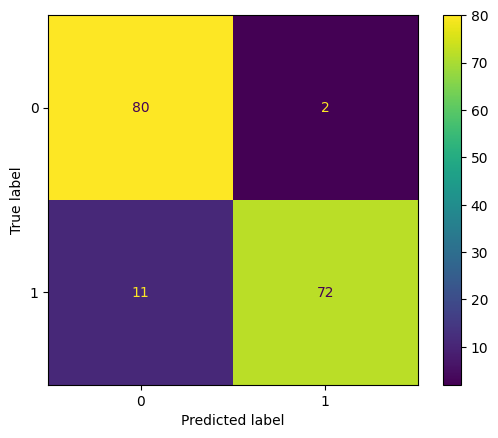

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

***Task 4***: *In the previous example, compute the precision, recall, F1-score. Discuss when accuracy is not the most suitable metric.*

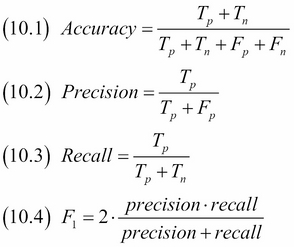

In [ ]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
print('Recall: %.3f' % recall)

score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

Precision: 0.973
Recall: 0.867
F-Measure: 0.917


**Discuss when accuracy is not the most suitable metric.**

When the data is skewed or highly imbalanced. When the data is imbalanced, and the model fails to detect the group with least number of samples, and succeeds in detecting the other group, we will get a high accuracy, even though, the model is not working properly.

***Task 5***: *Train different random forests by changing the number of trees from 2 to 15. Plot the training and testing accuracy of the trained models vs the number of trees. What do you notice?*

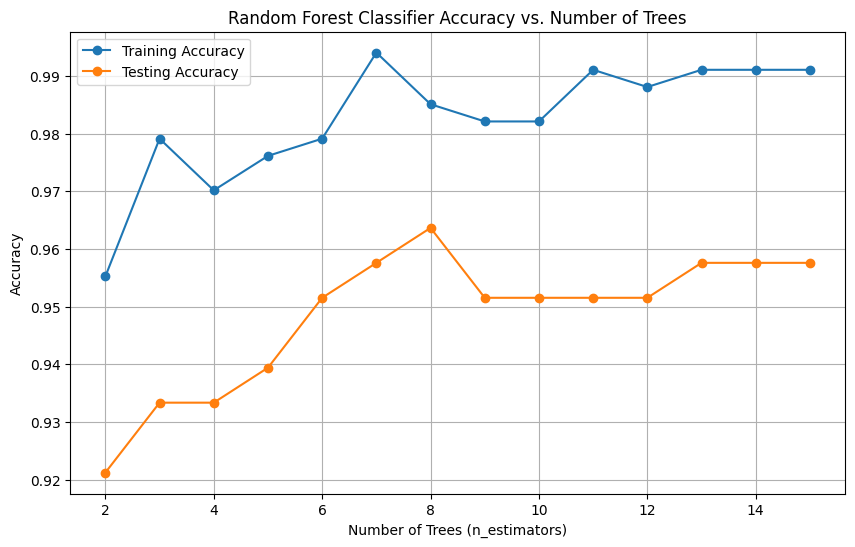

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define a range of n_estimators (number of trees)
n_estimators_values = list(range(2, 16))

# Create lists to store training and testing accuracies
training_accuracies = []
testing_accuracies = []

for n_estimators in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                criterion="entropy",
                                max_features="sqrt",
                                max_samples=0.8,
                                random_state=0)

    clf.fit(X_train, y_train)

    # Calculate training and testing accuracies
    training_accuracy = clf.score(X_train, y_train)
    testing_accuracy = clf.score(X_test, y_test)

    # Append accuracies to the respective lists
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, training_accuracies, marker='o', label='Training Accuracy')
plt.plot(n_estimators_values, testing_accuracies, marker='o', label='Testing Accuracy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()


**What you might notice in the plot:**

*   As the number of trees (n_estimators) increases, the training accuracy tends to improve. This is expected because adding more trees can help the model better fit the training data.

*   The testing accuracy may initially improve with more trees, but there might be a point beyond which it stabilizes or even starts to decrease. This behavior is due to the trade-off between model complexity and overfitting. Too many trees can lead to overfitting and reduced generalization to unseen data.

*   The gap between training and testing accuracy might widen as you increase the number of trees, indicating overfitting.


**Decision Surface**

Decision surface is a plot that shows how a machine learning model divides the feature space to different class labels. The following code visualizes the decision surface of our random forest model in the previous example

<center>Code Snippet 4.8: Decision Surface.<center/>

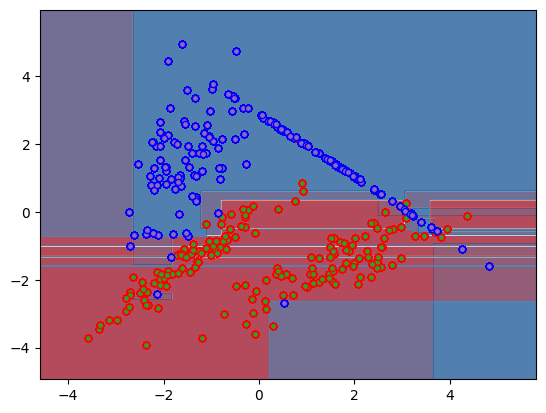

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

cmap = plt.cm.RdBu
plot_step = 0.02 # fine step width for decision surface contours
clf = RandomForestClassifier(n_estimators=2, criterion="entropy",
                            max_features="sqrt", max_samples=.8,
                            random_state=0)
clf.fit(X_train, y_train)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
                    np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

estimator_alpha = 1.0 / len(clf.estimators_)

for tree in clf.estimators_:
  Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

colors = ["r", "b"]
for c in y_train:
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
            [X_train[i, 1] for i in np.where(y_train==c)],
            edgecolor=colors[c], s=20, label="Samples")

***Task 6***: *Draw the decision surface for a set of random forests with different number of trees. Do you notice any pattern?*

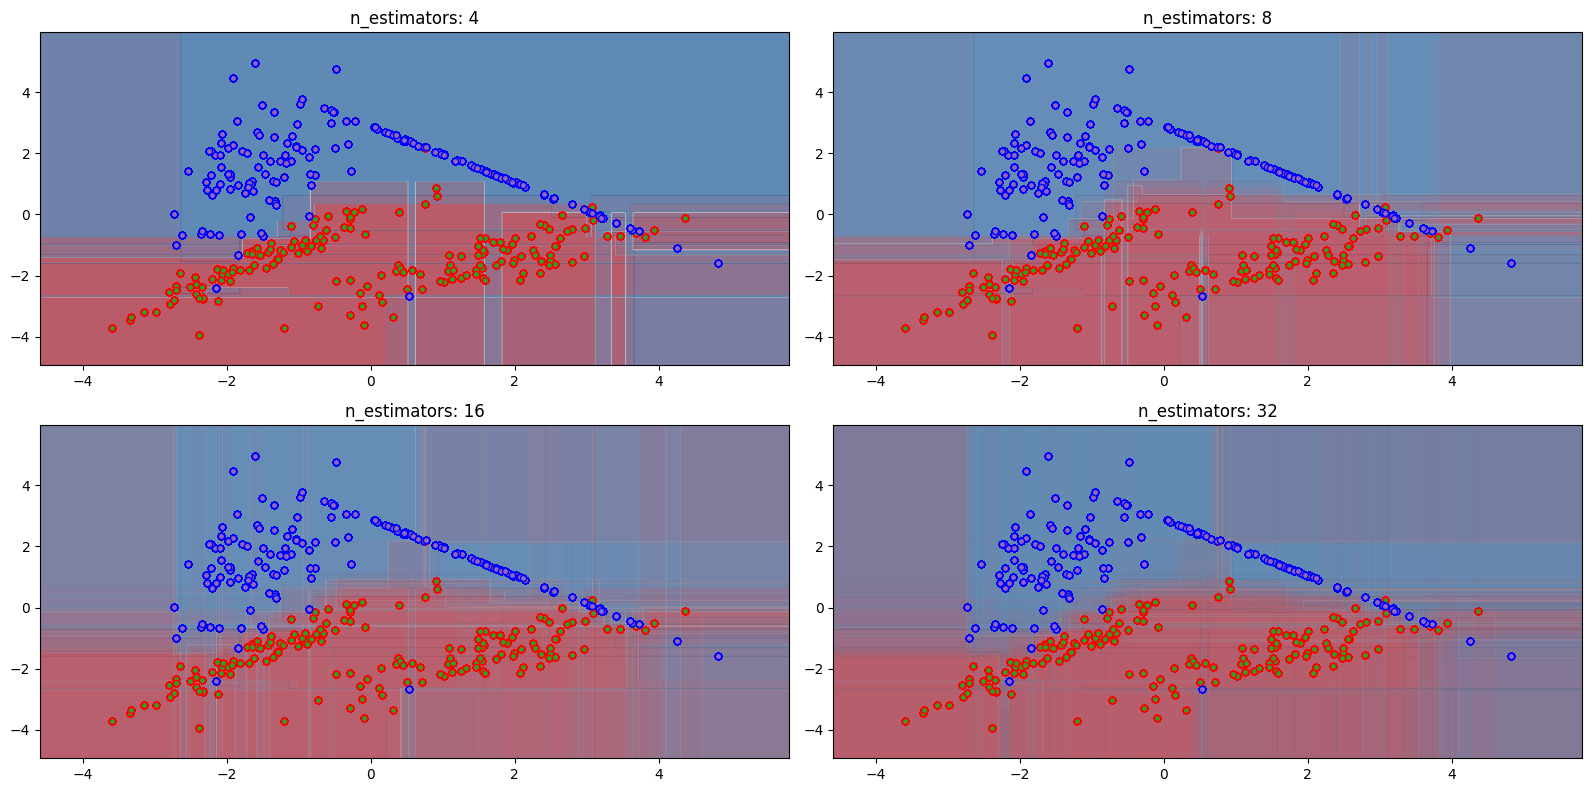

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Define n_estimators, X_train, and y_train
n_estimators = 2 ** np.arange(2, 6)

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)
cmap = plt.cm.RdBu
plot_step = 0.02

for i in range(2):
    for j in range(2):
        n_estimator = n_estimators[i * 2 + j]
        clf = RandomForestClassifier(n_estimators=n_estimator, criterion="entropy",
                                    max_features="sqrt", max_samples=0.8,
                                    random_state=0)
        clf.fit(X_train, y_train)

        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step),
            np.arange(y_min, y_max, plot_step)
        )

        estimator_alpha = 1.0 / len(clf.estimators_)

        for tree in clf.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = axs[i][j].contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        colors = ["r", "b"]
        for c in y_train:
            axs[i][j].scatter([X_train[i, 0] for i in np.where(y_train == c)],
                              [X_train[i, 1] for i in np.where(y_train == c)],
                              edgecolor=colors[c], s=20, label="Samples")

        axs[i][j].set_title("n_estimators: " + str(n_estimator))

fig.tight_layout(pad=1)
plt.show()

## **4.2.3 Classification with SVM**

In this section, we will test another popular classifier, which is support vector machine (SVM). SVM tries to find a separating hyper-plane between the classes with rthe maximum margin. The following code trains an SVM classifier with linear kernel on our toy dataset

<center>Code Snippet 4.9: SVM classifier<center/>

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


***Task 7***: *Draw the decision surface for the SVM model in the previous example.*

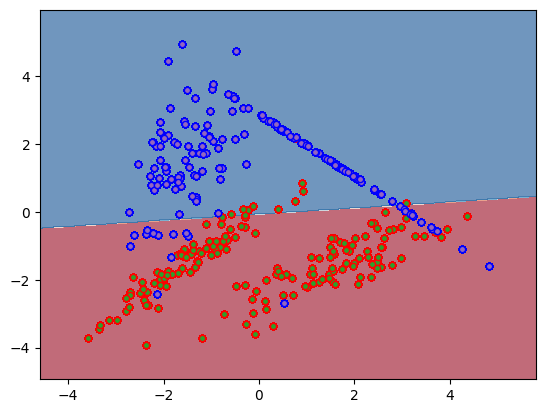

In [ ]:
cmap = plt.cm.RdBu

# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
                    np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.62, cmap=cmap)

colors = ["r", "b"]
for c in y_train:
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
            [X_train[i, 1] for i in np.where(y_train==c)],
            edgecolor=colors[c], s=20, label="Samples")

***Task 8***: *Train an SVM model with rbf kernel and draw its decision boundary. What do you notice?*

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel="rbf", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.9701492537313433
Testing Accuracy:  0.9636363636363636


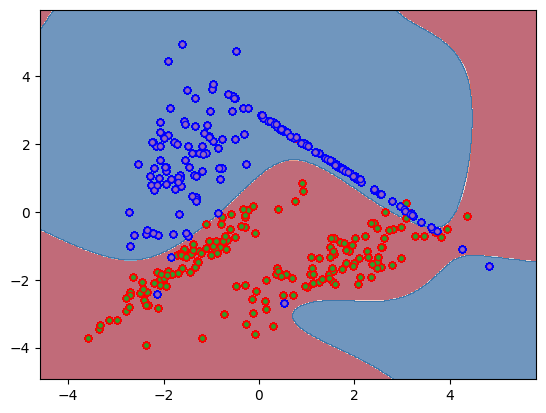

In [ ]:
cmap = plt.cm.RdBu

# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
                    np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.62, cmap=cmap)

colors = ["r", "b"]
for c in y_train:
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
            [X_train[i, 1] for i in np.where(y_train==c)],
            edgecolor=colors[c], s=20, label="Samples")

***Task 9***: *Repeat task 8 but with C equal 0.5, 1, 100, and 1000. What do you notice?*

C:  0.5
Training Accuracy:  0.9522388059701492
Testing Accuracy:  0.9575757575757575

C:  1
Training Accuracy:  0.9522388059701492
Testing Accuracy:  0.9575757575757575

C:  1000
Training Accuracy:  0.9701492537313433
Testing Accuracy:  0.9636363636363636



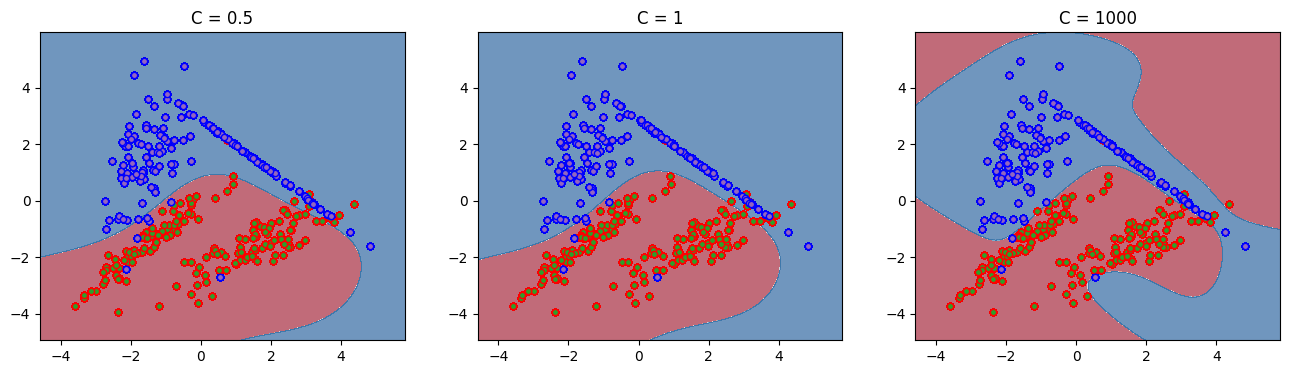

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt

C = [0.5, 1, 1000]
cmap = plt.cm.RdBu
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
plot_step = 0.02 # fine step width for decision surface contours

for i, c in enumerate(C):
    clf = svm.SVC(kernel="rbf", C=c)
    clf.fit(X_train, y_train)
    print("C: ", c)
    print("Training Accuracy: ", clf.score(X_train, y_train))
    print("Testing Accuracy: ", clf.score(X_test, y_test))
    print()

    # Create a meshgrid for plotting the decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Use axs[i] to specify the subplot
    cs = axs[i].contourf(xx, yy, Z, alpha=0.62, cmap=cmap)

    colors = ["r", "b"]
    for z in y_train:
        axs[i].scatter([X_train[j, 0] for j in np.where(y_train == z)],
                       [X_train[j, 1] for j in np.where(y_train == z)],
                       edgecolor=colors[z], s=20, label="Samples")

    axs[i].set_title("C = " + str(c))

# **4.3 Hyper-parameters selection**

Hyper-parameters are parameters that are set before starting the training process and not directly learnt within estimators. Typical examples include number of trees and max depth in random forests, C and kernel for SVM ...etc.

To select hyper-parameters, usually we search the hyper-parameter space for the best cross-validation score (or if the dataset is large enough, we could search for the parameters with the best score on a validation set).

The following code use grid search with cross-validation to find the best hyperparameters for the SVM example in the previous section.


<center>Code Snippet 4.10: Hyper-parameters selection.<center/>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


***Task 10***: ***GridSearchCV*** *has an attribute called* **cv_results_,** *which is a dict with keys as column headers and values as columns. Print it and try to explain the values that you get.*

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00217924, 0.00156045, 0.00304718, 0.00148358, 0.01333261,
       0.0021287 ]), 'std_fit_time': array([4.99863428e-04, 5.06519135e-05, 4.97246086e-04, 6.52090461e-05,
       6.10803742e-03, 2.31650151e-04]), 'mean_score_time': array([0.00087347, 0.00079079, 0.00076904, 0.00073485, 0.00090632,
       0.00078316]), 'std_score_time': array([2.79615724e-04, 1.32715012e-05, 1.18106471e-04, 2.93204063e-05,
       9.57270755e-05, 4.52910968e-05]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}, {'C': 100, 'kernel': 'linear'}, {'C'

This data is typically used to evaluate the performance of different models and hyperparameters.


*   **'mean_fit_time'** and **'std_fit_time'**: These arrays represent the mean and standard deviation of the time it took to fit the model for each combination of hyperparameters.

*   **'mean_score_time'** and **'std_score_time'**: These arrays represent the mean and standard deviation of the time it took to score (evaluate) the model on the test data for each combination of hyperparameters.

*   **'param_C'** and **'param_kernel'**: These arrays show the values of the hyperparameters 'C' and 'kernel' for each combination.

*   **'params'**: This is a list of dictionaries, each dictionary containing a specific combination of hyperparameters.

*   **'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',** and **'split4_test_score'**: These arrays represent the test scores (e.g., accuracy) of the model on different data splits for each combination of hyperparameters. Each split corresponds to a different subset of the data, allowing for a more robust evaluation.

*   **'mean_test_score'**: This array contains the mean test scores across all data splits for each combination of hyperparameters. It provides an overall measure of the model's performance.

*   **'std_test_score'**: This array contains the standard deviation of the test scores across all data splits for each combination of hyperparameters. It indicates the variability in model performance.

*   **'rank_test_score'**: This array shows the ranking of each combination of hyperparameters based on the mean test score. Lower ranks indicate better-performing models.

# 4.4 To Do

This part will be given by the instructor during the lab.

**Task**: add $cos(1.5πx)$ to the original function, generate training and testing sets, then find the best value for the degree for a olynomial regression model.

---

We generate the data.

In [23]:
import numpy as np

def true_fun(X):
  return np.sin(1.5 * np.pi * X) + np.cos(2.5 * np.pi * X)

np.random.seed(0)
n_samples = 40

X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1

X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

We plot the original data.

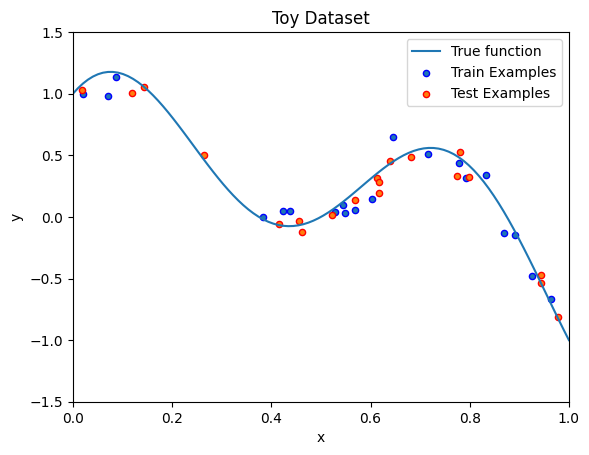

In [24]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

Then, we calculate the $MSE$ for degrees in $range$ $2-16$, and choose the degree that have the smallest $MSE$.

In [25]:
from sklearn.metrics import mean_squared_error

for degree in range(2, 17):
  polynomial_features = PolynomialFeatures(degree, include_bias=True)

  q_model = LinearRegression()
  q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

  X_test_poly = polynomial_features.transform(X_test[:, np.newaxis])
  y_pred = q_model.predict(X_test_poly)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)

  print(f"Mean Squared Error on Test Set (degree " + str(degree) + "): ", mse)

Mean Squared Error on Test Set (degree 2):  0.11485859889929376
Mean Squared Error on Test Set (degree 3):  0.06356037730363191
Mean Squared Error on Test Set (degree 4):  0.016898863774583904
Mean Squared Error on Test Set (degree 5):  0.006991009089089553
Mean Squared Error on Test Set (degree 6):  0.005328300949377655
Mean Squared Error on Test Set (degree 7):  0.007356302871907225
Mean Squared Error on Test Set (degree 8):  0.008608923008779133
Mean Squared Error on Test Set (degree 9):  0.010666343434471256
Mean Squared Error on Test Set (degree 10):  0.07716326942021529
Mean Squared Error on Test Set (degree 11):  0.24432779932674334
Mean Squared Error on Test Set (degree 12):  7.394230788377183
Mean Squared Error on Test Set (degree 13):  66.364097728568
Mean Squared Error on Test Set (degree 14):  1795.442176427554
Mean Squared Error on Test Set (degree 15):  503.6525248596521
Mean Squared Error on Test Set (degree 16):  69678.74471165953


It is clear from the values above that the best value for degree is $6$.

---

We plot the the samples, true function, and the model polynomial for four degrees $5-8$.

Mean Squared Error on Test Set (degree 5):  0.006991009089089553
Mean Squared Error on Test Set (degree 6):  0.005328300949377655
Mean Squared Error on Test Set (degree 7):  0.007356302871907225
Mean Squared Error on Test Set (degree 8):  0.008608923008779133


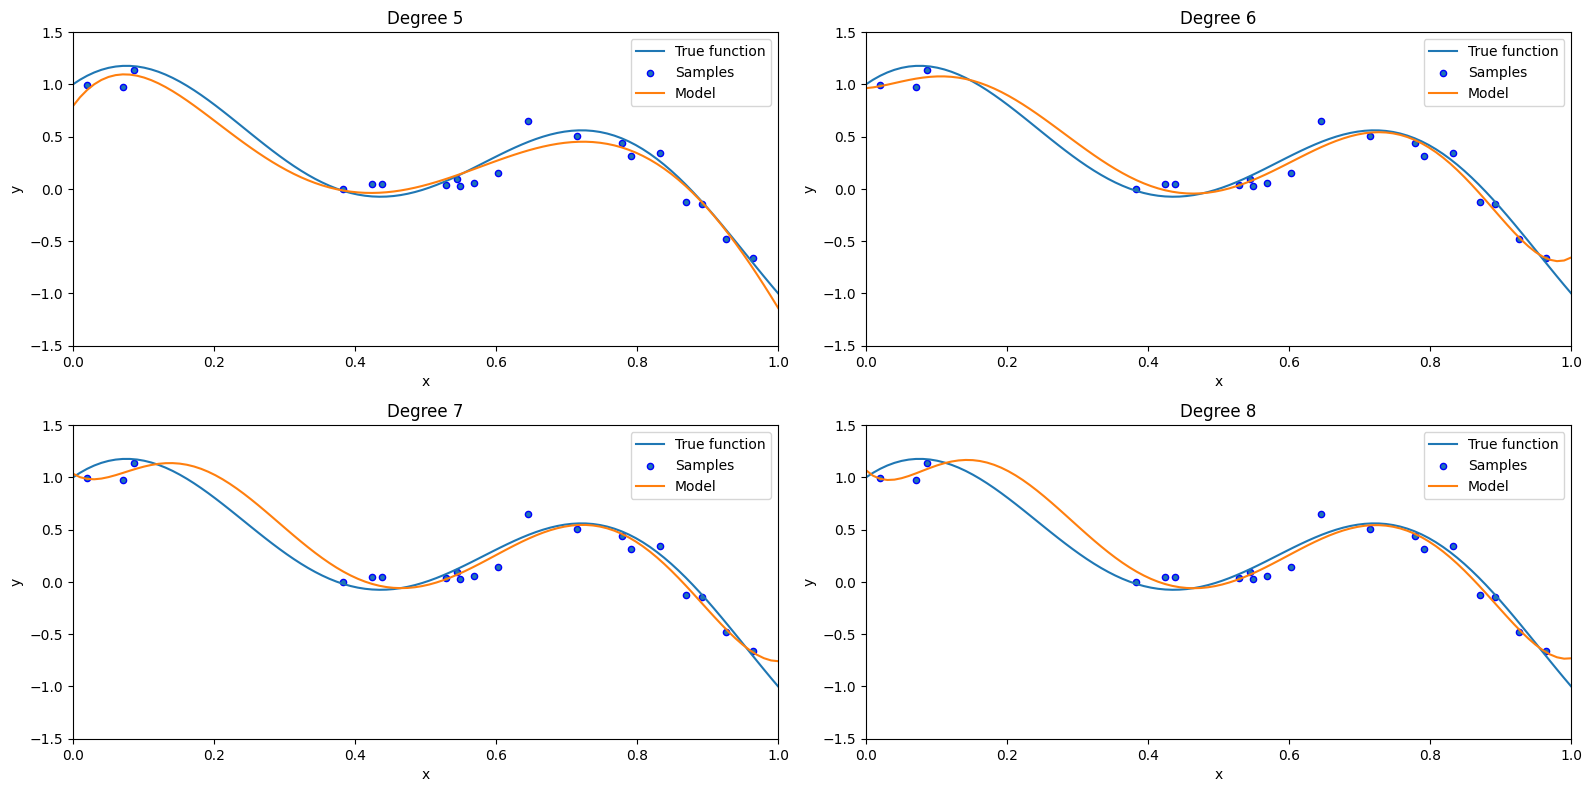

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

degrees = [5, 6, 7, 8]

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)
plot_step = 0.02

for i in range(2):
    for j in range(2):
      degree = degrees[i * 2 + j]
      polynomial_features = PolynomialFeatures(degree, include_bias=True)

      q_model = LinearRegression()
      q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

      x = np.linspace(0, 1, 100)

      axs[i][j].plot(x, true_fun(x), label="True function")
      axs[i][j].scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
      axs[i][j].plot(x, q_model.predict(polynomial_features.fit_transform(x[:, np.newaxis])), label="Model")
      axs[i][j].set_xlabel("x")
      axs[i][j].set_ylabel("y")
      axs[i][j].set_xlim((0, 1))
      axs[i][j].set_ylim((-1.5, 1.5))

      axs[i][j].legend(loc="best")
      axs[i][j].set_title("Degree " + str(degree))

      X_test_poly = polynomial_features.transform(X_test[:, np.newaxis])
      y_pred = q_model.predict(X_test_poly)

      # Calculate the mean squared error
      mse = mean_squared_error(y_test, y_pred)

      print(f"Mean Squared Error on Test Set (degree " + str(degree) + "): ", mse)

fig.tight_layout(pad=1)
plt.show()

Plots are very close to each other.

**Note**: for best practise, it is not preferable to use testing data for choosing parameters like degrees, for example, in calculating **MSE**. However, we should use validation set or cross-validation.